In [9]:
# 1. 필요한 패키지 설치 및 로딩

import sys
import subprocess

# 필요한 패키지 자동 설치
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

try:
    from skbio.diversity.alpha import shannon
except ImportError:
    install("scikit-bio")
    from skbio.diversity.alpha import shannon

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import braycurtis
from skbio.stats.distance import DistanceMatrix
from skbio.stats.distance import permanova


In [10]:
# 1. 데이터 불러오기

# confounder 제거된 최종 병합 파일
df = pd.read_csv("!merged_metadata_feature3.csv")

# 2. 'alias' 컬럼 드롭
df = df.drop(columns=['alias'], errors='ignore')

# 2. 메타데이터 및 feature 분리
metadata_cols = ['sample_id', 'parkinson']
feature_cols = df.columns.difference(metadata_cols)

# 3. parkinson이 결측치인 행 제거 (-> 해당 sample_id의 feature도 같이 제거됨)
df_clean = df.dropna(subset=['parkinson'])

# 4. feature 영역에 NaN 있는 행 제거
df_clean = df_clean.dropna(subset=feature_cols)

In [13]:
missing_counts = df_clean.isna().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
print(missing_counts)


Series([], dtype: int64)


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


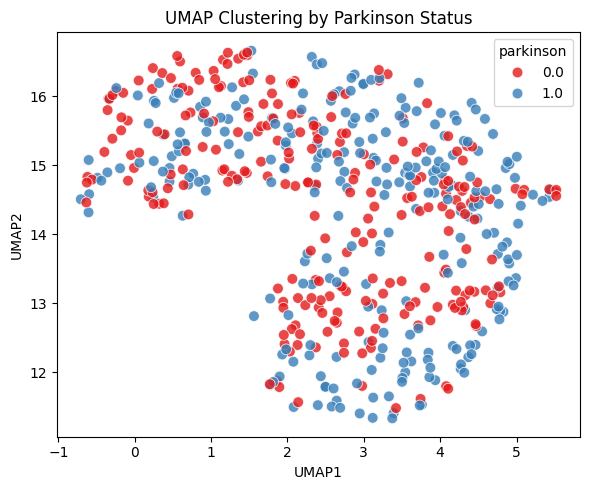

In [19]:
# ✅ 1. UMAP 군집 시각화
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from umap import UMAP
from sklearn.preprocessing import StandardScaler

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[feature_cols])

# UMAP 시각화
umap_model = UMAP(n_neighbors=15, min_dist=0.1, metric='braycurtis', random_state=42)
embedding = umap_model.fit_transform(X_scaled)

umap_df = pd.DataFrame(embedding, columns=["UMAP1", "UMAP2"])
umap_df['parkinson'] = df_clean['parkinson'].values

plt.figure(figsize=(6,5))
sns.scatterplot(data=umap_df, x="UMAP1", y="UMAP2", hue="parkinson", palette="Set1", s=60, alpha=0.8)
plt.title("UMAP Clustering by Parkinson Status")
plt.tight_layout()
plt.savefig("umap_parkinson.png")
plt.show()


Running UMAP with n_neighbors=5, min_dist=0.0, metric=braycurtis


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


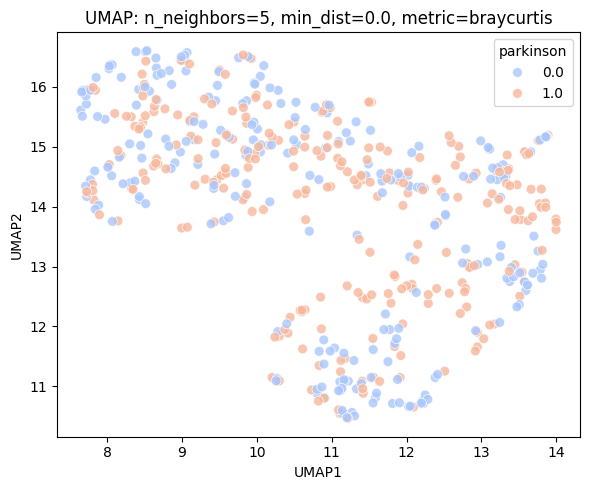

Running UMAP with n_neighbors=5, min_dist=0.0, metric=cosine


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


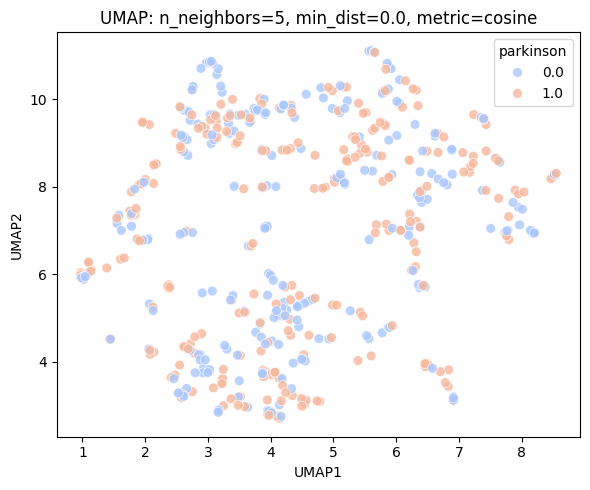

Running UMAP with n_neighbors=5, min_dist=0.0, metric=euclidean


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


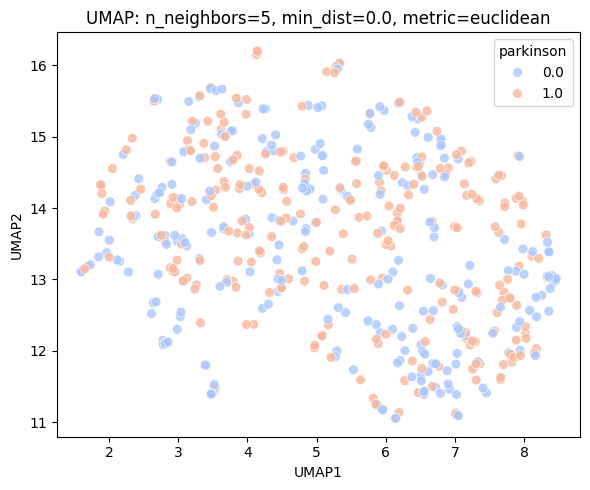

Running UMAP with n_neighbors=5, min_dist=0.1, metric=braycurtis


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


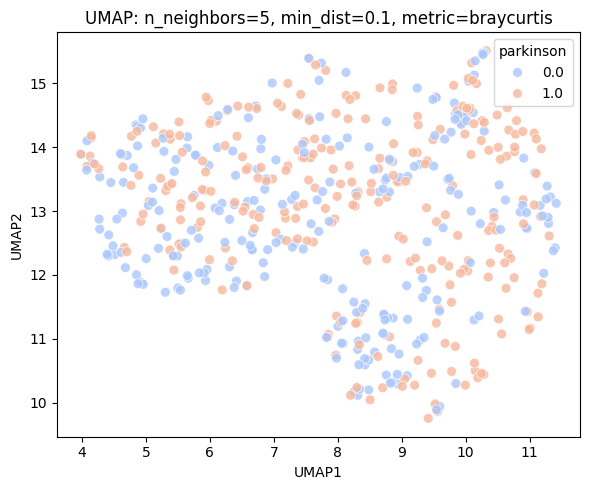

Running UMAP with n_neighbors=5, min_dist=0.1, metric=cosine


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


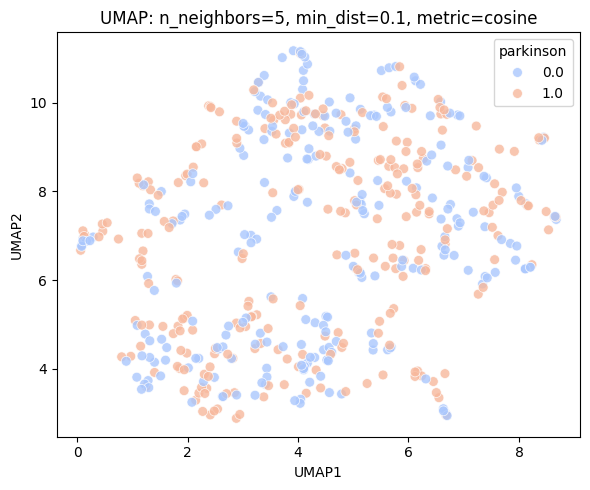

Running UMAP with n_neighbors=5, min_dist=0.1, metric=euclidean


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


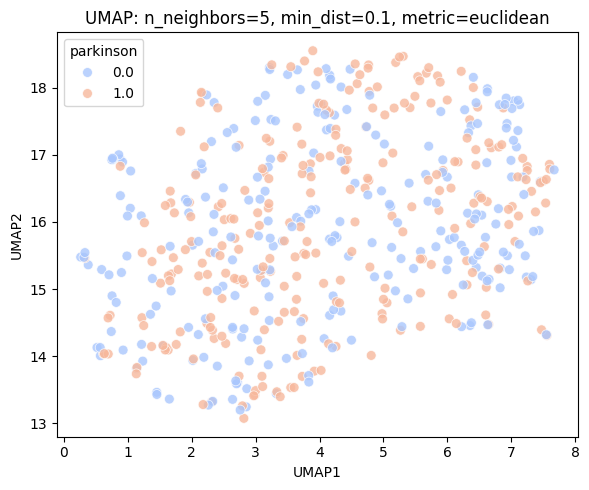

Running UMAP with n_neighbors=5, min_dist=0.5, metric=braycurtis


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


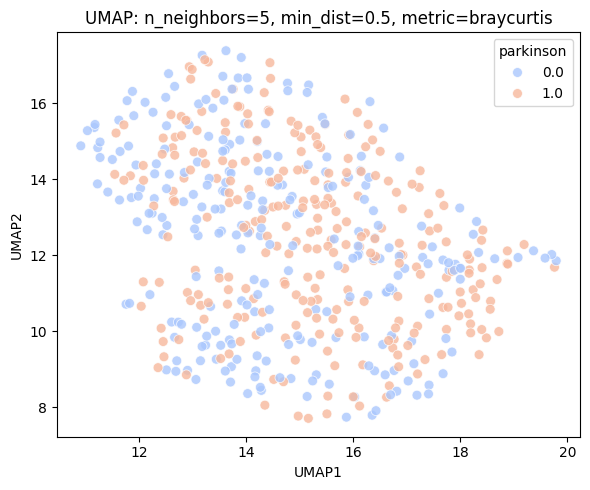

Running UMAP with n_neighbors=5, min_dist=0.5, metric=cosine


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


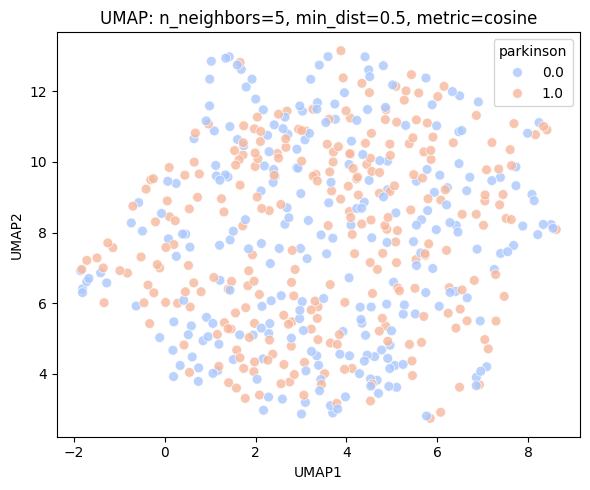

Running UMAP with n_neighbors=5, min_dist=0.5, metric=euclidean


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


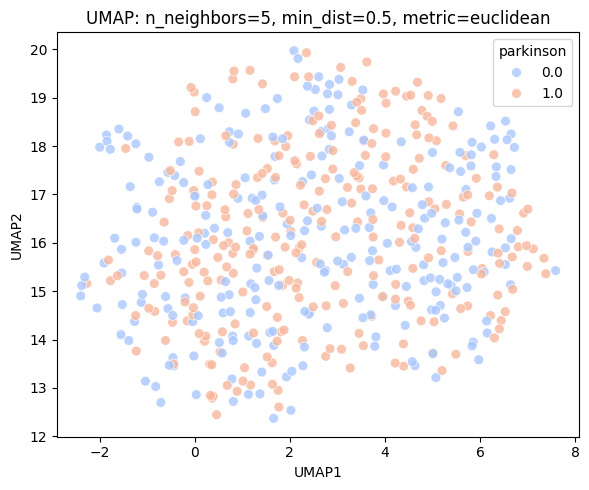

Running UMAP with n_neighbors=15, min_dist=0.0, metric=braycurtis


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


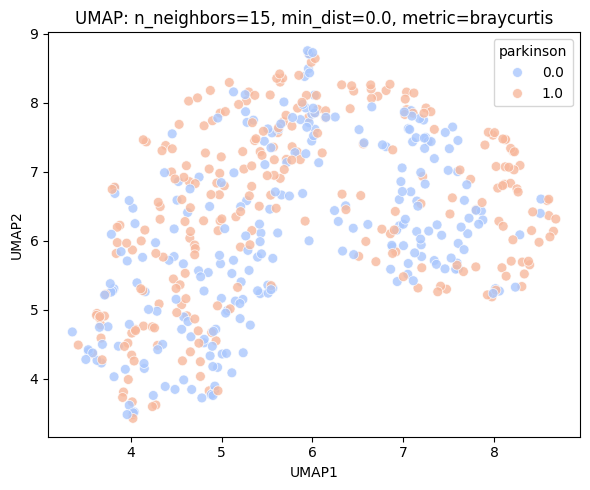

Running UMAP with n_neighbors=15, min_dist=0.0, metric=cosine


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


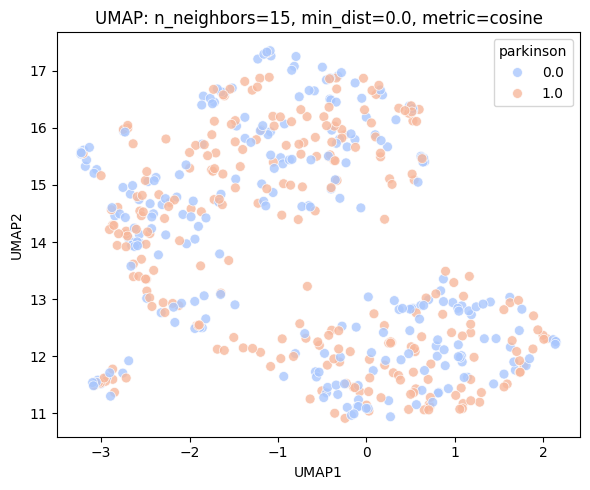

Running UMAP with n_neighbors=15, min_dist=0.0, metric=euclidean


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


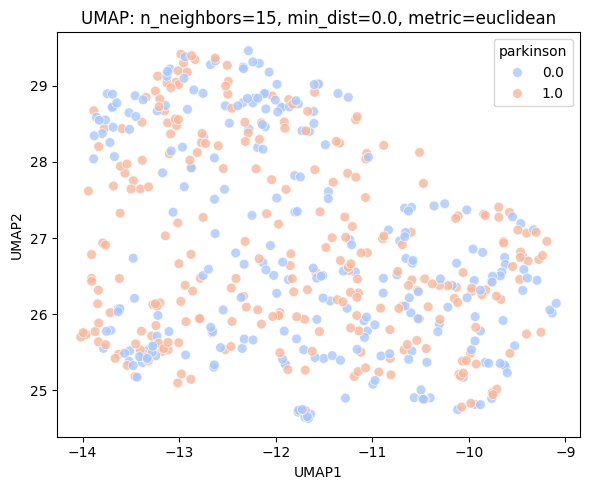

Running UMAP with n_neighbors=15, min_dist=0.1, metric=braycurtis


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


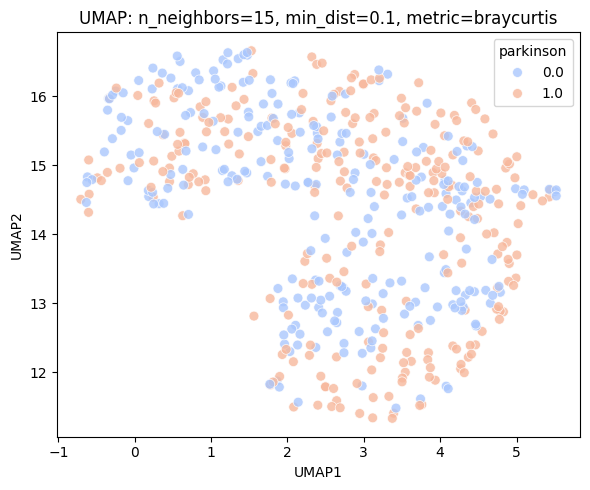

Running UMAP with n_neighbors=15, min_dist=0.1, metric=cosine


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


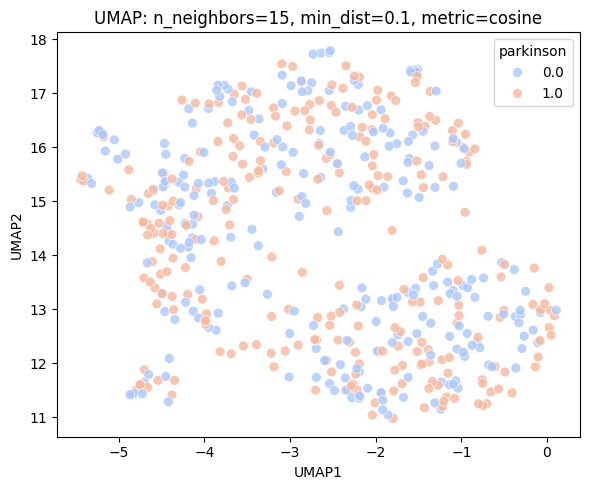

Running UMAP with n_neighbors=15, min_dist=0.1, metric=euclidean


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


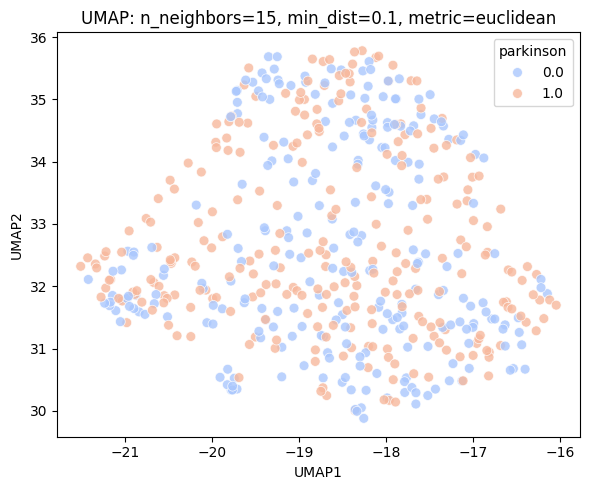

Running UMAP with n_neighbors=15, min_dist=0.5, metric=braycurtis


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


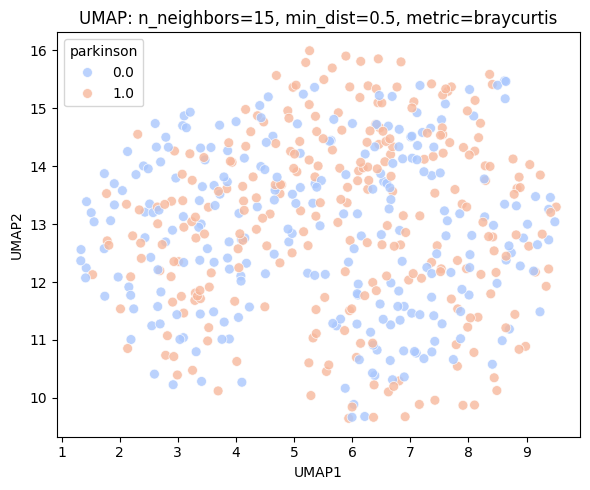

Running UMAP with n_neighbors=15, min_dist=0.5, metric=cosine


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


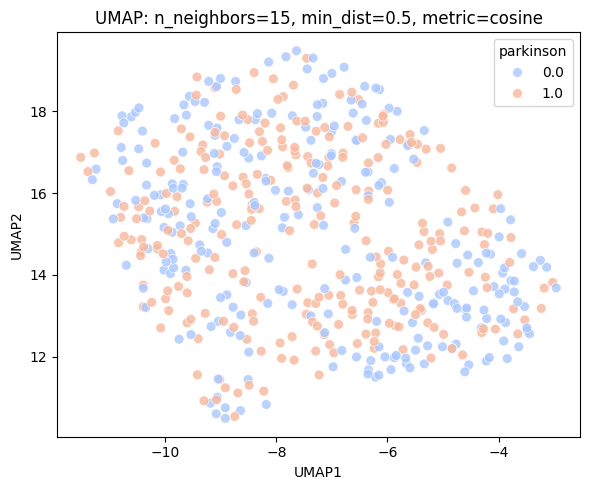

Running UMAP with n_neighbors=15, min_dist=0.5, metric=euclidean


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


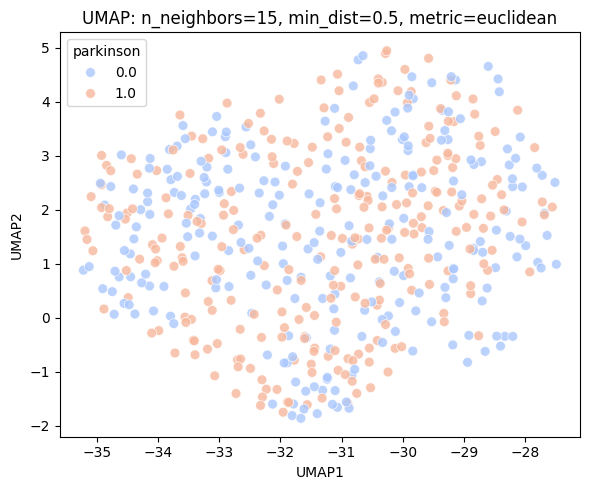

Running UMAP with n_neighbors=30, min_dist=0.0, metric=braycurtis


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


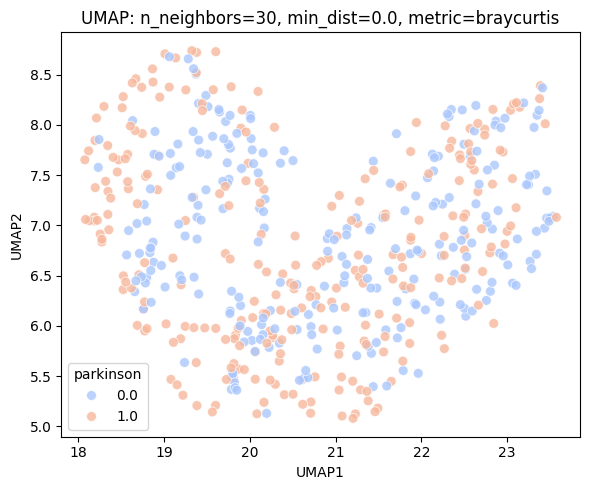

Running UMAP with n_neighbors=30, min_dist=0.0, metric=cosine


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


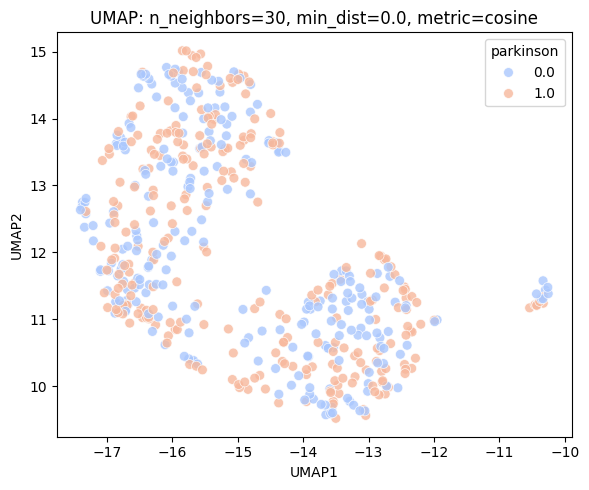

Running UMAP with n_neighbors=30, min_dist=0.0, metric=euclidean


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


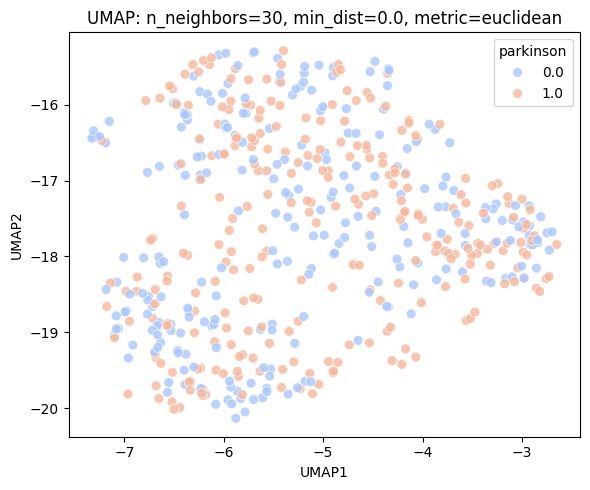

Running UMAP with n_neighbors=30, min_dist=0.1, metric=braycurtis


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


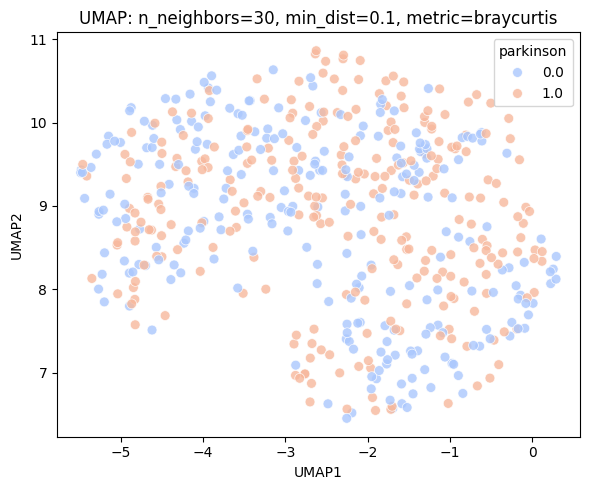

Running UMAP with n_neighbors=30, min_dist=0.1, metric=cosine


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


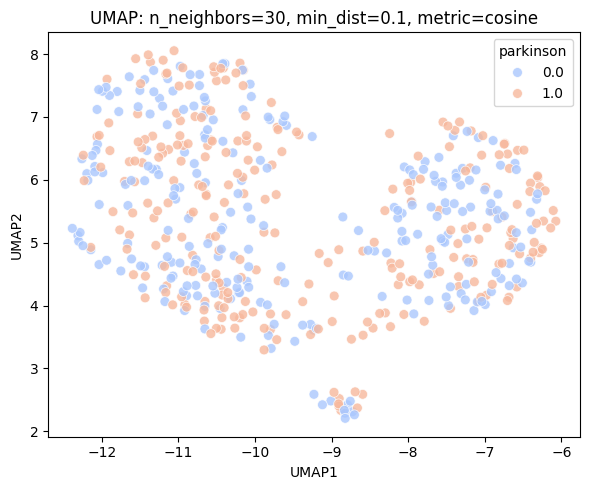

Running UMAP with n_neighbors=30, min_dist=0.1, metric=euclidean


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


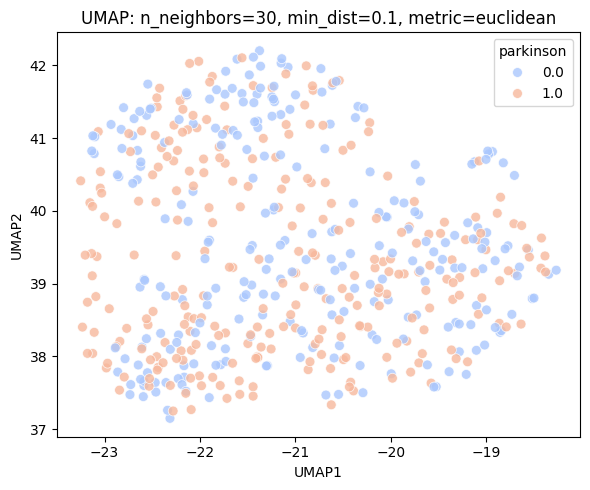

Running UMAP with n_neighbors=30, min_dist=0.5, metric=braycurtis


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


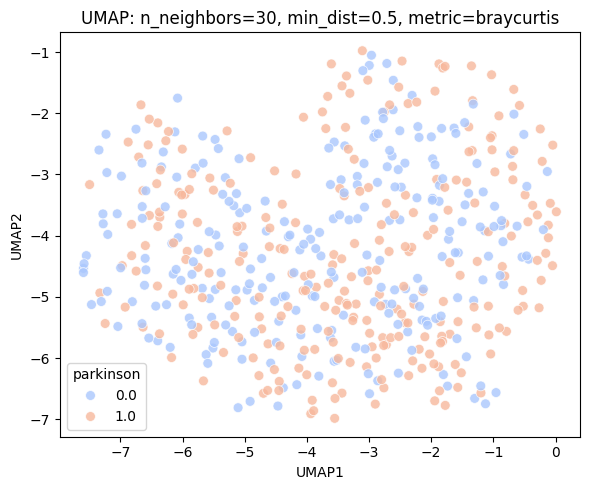

Running UMAP with n_neighbors=30, min_dist=0.5, metric=cosine


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


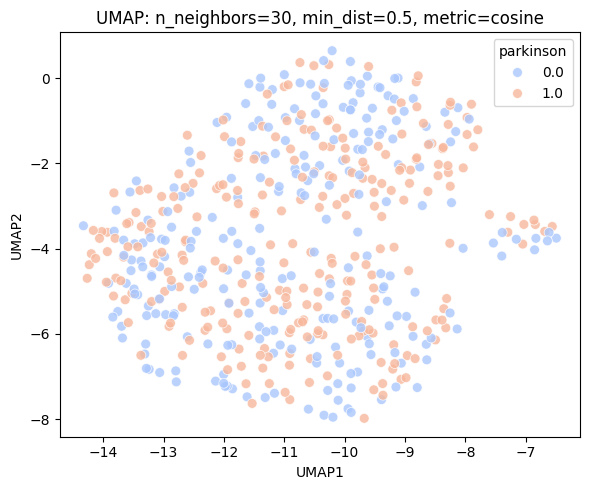

Running UMAP with n_neighbors=30, min_dist=0.5, metric=euclidean


c:\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


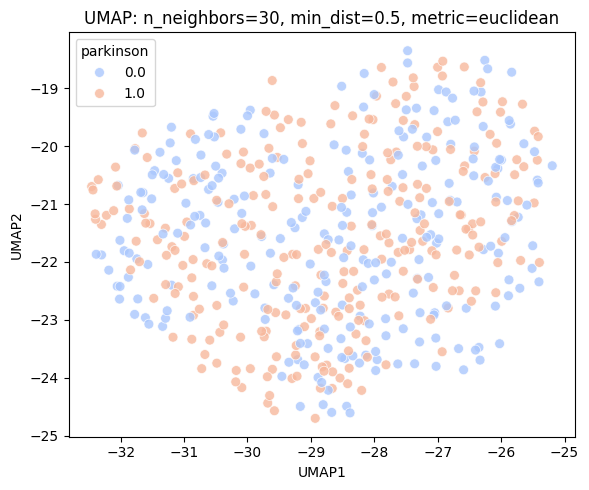

In [23]:
from umap import UMAP


# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[feature_cols])
y = df_clean['parkinson'].values

# 파라미터 그리드 정의
neighbor_list = [5, 15, 30]
min_dist_list = [0.0, 0.1, 0.5]
metric_list = ["braycurtis", "cosine", "euclidean"]

# 실험 루프
for n_neighbors in neighbor_list:
    for min_dist in min_dist_list:
        for metric in metric_list:
            print(f"Running UMAP with n_neighbors={n_neighbors}, min_dist={min_dist}, metric={metric}")
            
            umap_model = UMAP(
                n_neighbors=n_neighbors,
                min_dist=min_dist,
                metric=metric,
                random_state=42
            )
            
            embedding = umap_model.fit_transform(X_scaled)

            # 결과 DataFrame 구성
            umap_df = pd.DataFrame(embedding, columns=["UMAP1", "UMAP2"])
            umap_df["parkinson"] = y

            # 시각화
            plt.figure(figsize=(6, 5))
            sns.scatterplot(
                data=umap_df,
                x="UMAP1",
                y="UMAP2",
                hue="parkinson",
                palette="coolwarm",
                s=50,
                alpha=0.8
            )
            plt.title(f"UMAP: n_neighbors={n_neighbors}, min_dist={min_dist}, metric={metric}")
            plt.tight_layout()
            plt.show()

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 1. 데이터 불러오기
df = pd.read_csv("!merged_metadata_feature3.csv")

# 2. 결측치가 있는 타겟 제거
df = df.dropna(subset=["parkinson"])

# 3. 'alias' 제거
df = df.drop(columns=["alias"], errors="ignore")

# 4. 메타데이터 분리
metadata_cols = ["sample_id", "parkinson"]
feature_cols = df.columns.difference(metadata_cols)
df_clean = df[metadata_cols + list(feature_cols)].dropna()
df_clean = df_clean[df_clean[feature_cols].sum(axis=1) > 0]

# 5. X, y 분리
X = df_clean[feature_cols]
y = df_clean["parkinson"].astype(int)

# 6. 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Train/Test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 8. XGBoost
xgb = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1,
                    use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_proba = xgb.predict_proba(X_test)[:, 1]
print("XGBoost:")
print(classification_report(y_test, xgb_pred))
print("AUC:", roc_auc_score(y_test, xgb_proba))

# 9. LightGBM
lgbm = LGBMClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
lgbm_proba = lgbm.predict_proba(X_test)[:, 1]
print("LightGBM:")
print(classification_report(y_test, lgbm_pred))
print("AUC:", roc_auc_score(y_test, lgbm_proba))


c:\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:37:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost:
              precision    recall  f1-score   support

           0       0.69      0.66      0.67        50
           1       0.70      0.72      0.71        54

    accuracy                           0.69       104
   macro avg       0.69      0.69      0.69       104
weighted avg       0.69      0.69      0.69       104

AUC: 0.7751851851851852
[LightGBM] [Info] Number of positive: 214, number of negative: 199
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9818
[LightGBM] [Info] Number of data points in the train set: 413, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.518160 -> initscore=0.072671
[LightGBM] [Info] Start training from score 0.072671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

c:\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



===== Ridge =====
              precision    recall  f1-score   support

           0       0.56      0.60      0.58        50
           1       0.60      0.56      0.58        54

    accuracy                           0.58       104
   macro avg       0.58      0.58      0.58       104
weighted avg       0.58      0.58      0.58       104

AUC: 0.5477777777777778


C:\Users\user\AppData\Local\Temp\ipykernel_20368\4070398932.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x="Coefficient", y="Feature", palette="coolwarm")


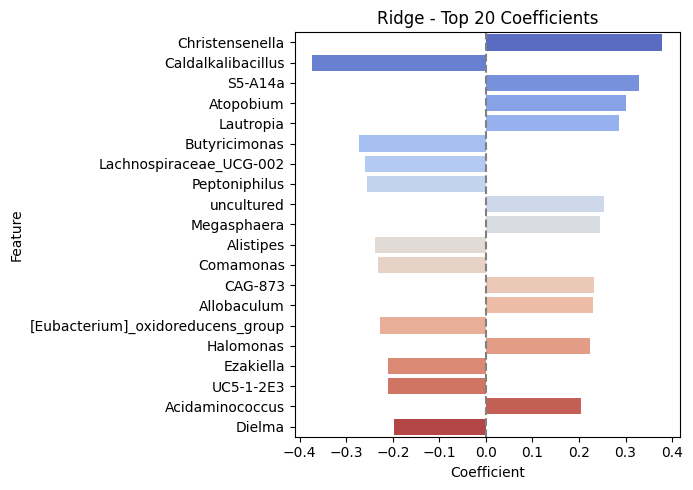


===== Lasso =====
              precision    recall  f1-score   support

           0       0.59      0.58      0.59        50
           1       0.62      0.63      0.62        54

    accuracy                           0.61       104
   macro avg       0.61      0.60      0.60       104
weighted avg       0.61      0.61      0.61       104

AUC: 0.6103703703703706


C:\Users\user\AppData\Local\Temp\ipykernel_20368\4070398932.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x="Coefficient", y="Feature", palette="coolwarm")


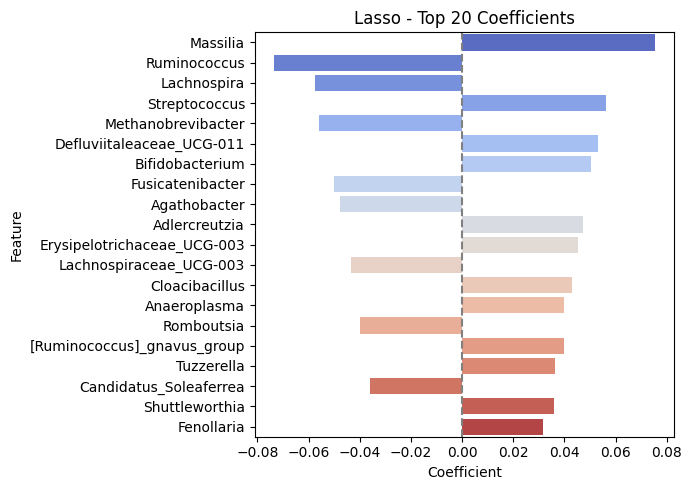


===== ElasticNet =====
              precision    recall  f1-score   support

           0       0.60      0.58      0.59        50
           1       0.62      0.65      0.64        54

    accuracy                           0.62       104
   macro avg       0.61      0.61      0.61       104
weighted avg       0.61      0.62      0.61       104

AUC: 0.6007407407407407


C:\Users\user\AppData\Local\Temp\ipykernel_20368\4070398932.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x="Coefficient", y="Feature", palette="coolwarm")


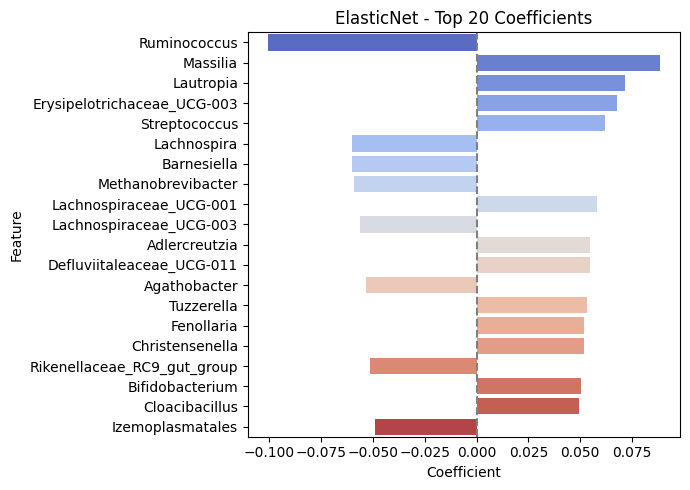

In [26]:
# 선형모델 baseline, 해석력좋은 모델을 사용하여 확인해보기

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 불러오기
df = pd.read_csv("!merged_metadata_feature3.csv")
df = df.drop(columns=["alias"], errors="ignore")
df = df.dropna(subset=["parkinson"])
df["parkinson"] = df["parkinson"].astype(int)

# 2. feature/target 분리
metadata_cols = ['sample_id', 'parkinson']
feature_cols = df.columns.difference(metadata_cols)
df_clean = df[metadata_cols + list(feature_cols)].dropna()
df_clean = df_clean[df_clean[feature_cols].sum(axis=1) > 0]

X = df_clean[feature_cols]
y = df_clean["parkinson"]

# 3. train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. 모델들 정의
models = {
    "Ridge": Ridge(alpha=1.0, random_state=42),
    "Lasso": Lasso(alpha=0.01, random_state=42),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)
}

# 6. 반복 적용
for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train_scaled, y_train)
    
    # 예측 및 평가
    y_pred = model.predict(X_test_scaled)
    y_bin = (y_pred >= 0.5).astype(int)  # 0.5 기준 이진화
    print(classification_report(y_test, y_bin))
    print("AUC:", roc_auc_score(y_test, y_pred))
    
    # 변수 중요도 시각화
    coef = model.coef_
    coef_df = pd.DataFrame({
        "Feature": X.columns,
        "Coefficient": coef
    }).sort_values("Coefficient", key=np.abs, ascending=False).head(20)

    plt.figure(figsize=(7, 5))
    sns.barplot(data=coef_df, x="Coefficient", y="Feature", palette="coolwarm")
    plt.title(f"{name} - Top 20 Coefficients")
    plt.axvline(0, color="gray", linestyle="--")
    plt.tight_layout()
    plt.savefig(f"{name}_coefficients.png")
    plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_20368\437519221.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="parkinson", y="shannon", data=df, palette="Set2")


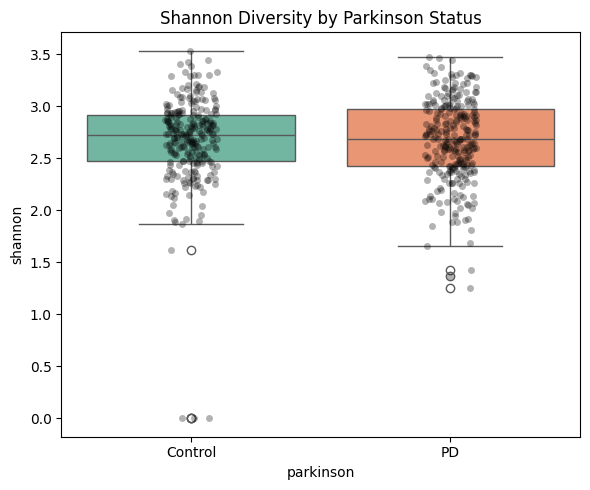

Mann-Whitney U Test
Statistic: 34401.0000, p-value: 0.7119


In [27]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon, ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 준비
df = pd.read_csv("!merged_metadata_feature3.csv")
df = df.drop(columns=["alias"], errors="ignore")
df = df.dropna(subset=["parkinson"])
df["parkinson"] = df["parkinson"].astype(int)

# 2. Feature만 추출
metadata_cols = ["sample_id", "parkinson"]
feature_cols = df.columns.difference(metadata_cols)
df_features = df[feature_cols]

# 3. Alpha diversity: Shannon index 계산
def shannon_index(row):
    p = row[row > 0] / row.sum()
    return -(p * np.log(p)).sum()

df["shannon"] = df_features.apply(shannon_index, axis=1)

# 4. 시각화 (박스플롯)
plt.figure(figsize=(6,5))
sns.boxplot(x="parkinson", y="shannon", data=df, palette="Set2")
sns.stripplot(x="parkinson", y="shannon", data=df, color="black", alpha=0.3, jitter=True)
plt.xticks([0, 1], ["Control", "PD"])
plt.title("Shannon Diversity by Parkinson Status")
plt.tight_layout()
plt.savefig("alpha_diversity_shannon.png")
plt.show()

# 5. 통계검정 (t-test or wilcoxon)
group0 = df[df["parkinson"] == 0]["shannon"]
group1 = df[df["parkinson"] == 1]["shannon"]

# 정규성 안가정하면 wilcoxon or mannwhitneyu
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(group0, group1, alternative='two-sided')

print("Mann-Whitney U Test")
print(f"Statistic: {stat:.4f}, p-value: {p:.4f}")


c:\Python\Python311\Lib\site-packages\skbio\stats\ordination\_principal_coordinate_analysis.py:258: RuntimeWarning: The result contains negative eigenvalues that are large in magnitude, which may suggest result inaccuracy. See Notes for details. The negative-most eigenvalue is -0.5992656053776555 whereas the largest positive one is 40.101934141999266.
  warn(
C:\Users\user\AppData\Local\Temp\ipykernel_20368\1182766236.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcoa_df['parkinson'] = y.values


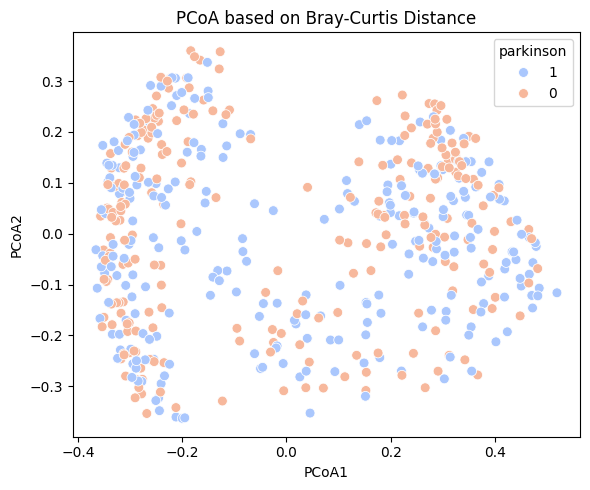

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     517
number of groups                  2
test statistic              3.56925
p-value                       0.003
number of permutations          999
Name: PERMANOVA results, dtype: object


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skbio.stats.ordination import pcoa
from skbio.diversity import beta_diversity
from skbio.stats.distance import permanova
from sklearn.preprocessing import StandardScaler

# 1. Feature matrix와 target 분리
X = df_clean[feature_cols]
y = df_clean['parkinson'].astype(str)  # 문자열로 변환 (필수)

# 2. NaN 및 0합 샘플 제거
X = X.loc[~(X.sum(axis=1) == 0)]
y = y.loc[X.index]

# 3. 스케일링 (Bray-Curtis는 안 해도 되지만 Euclidean은 필수)
# scaler = StandardScaler()
# X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)

# 4. 거리 행렬 계산 (Bray-Curtis 또는 Euclidean 추천)
distance_matrix = beta_diversity(
    metric='braycurtis',  # 또는 'euclidean', 'jaccard'
    counts=X.values,
    ids=X.index
)

# 5. PCoA 수행
pcoa_results = pcoa(distance_matrix)
pcoa_df = pcoa_results.samples.iloc[:, :2]  # PC1, PC2
pcoa_df['parkinson'] = y.values

# 6. 시각화
plt.figure(figsize=(6, 5))
sns.scatterplot(data=pcoa_df, x=pcoa_df.columns[0], y=pcoa_df.columns[1], hue='parkinson', palette='coolwarm', s=50)
plt.xlabel("PCoA1")
plt.ylabel("PCoA2")
plt.title("PCoA based on Bray-Curtis Distance")
plt.tight_layout()
plt.show()

# 7. PERMANOVA 통계검정
permanova_result = permanova(distance_matrix, y, permutations=999)
print(permanova_result)


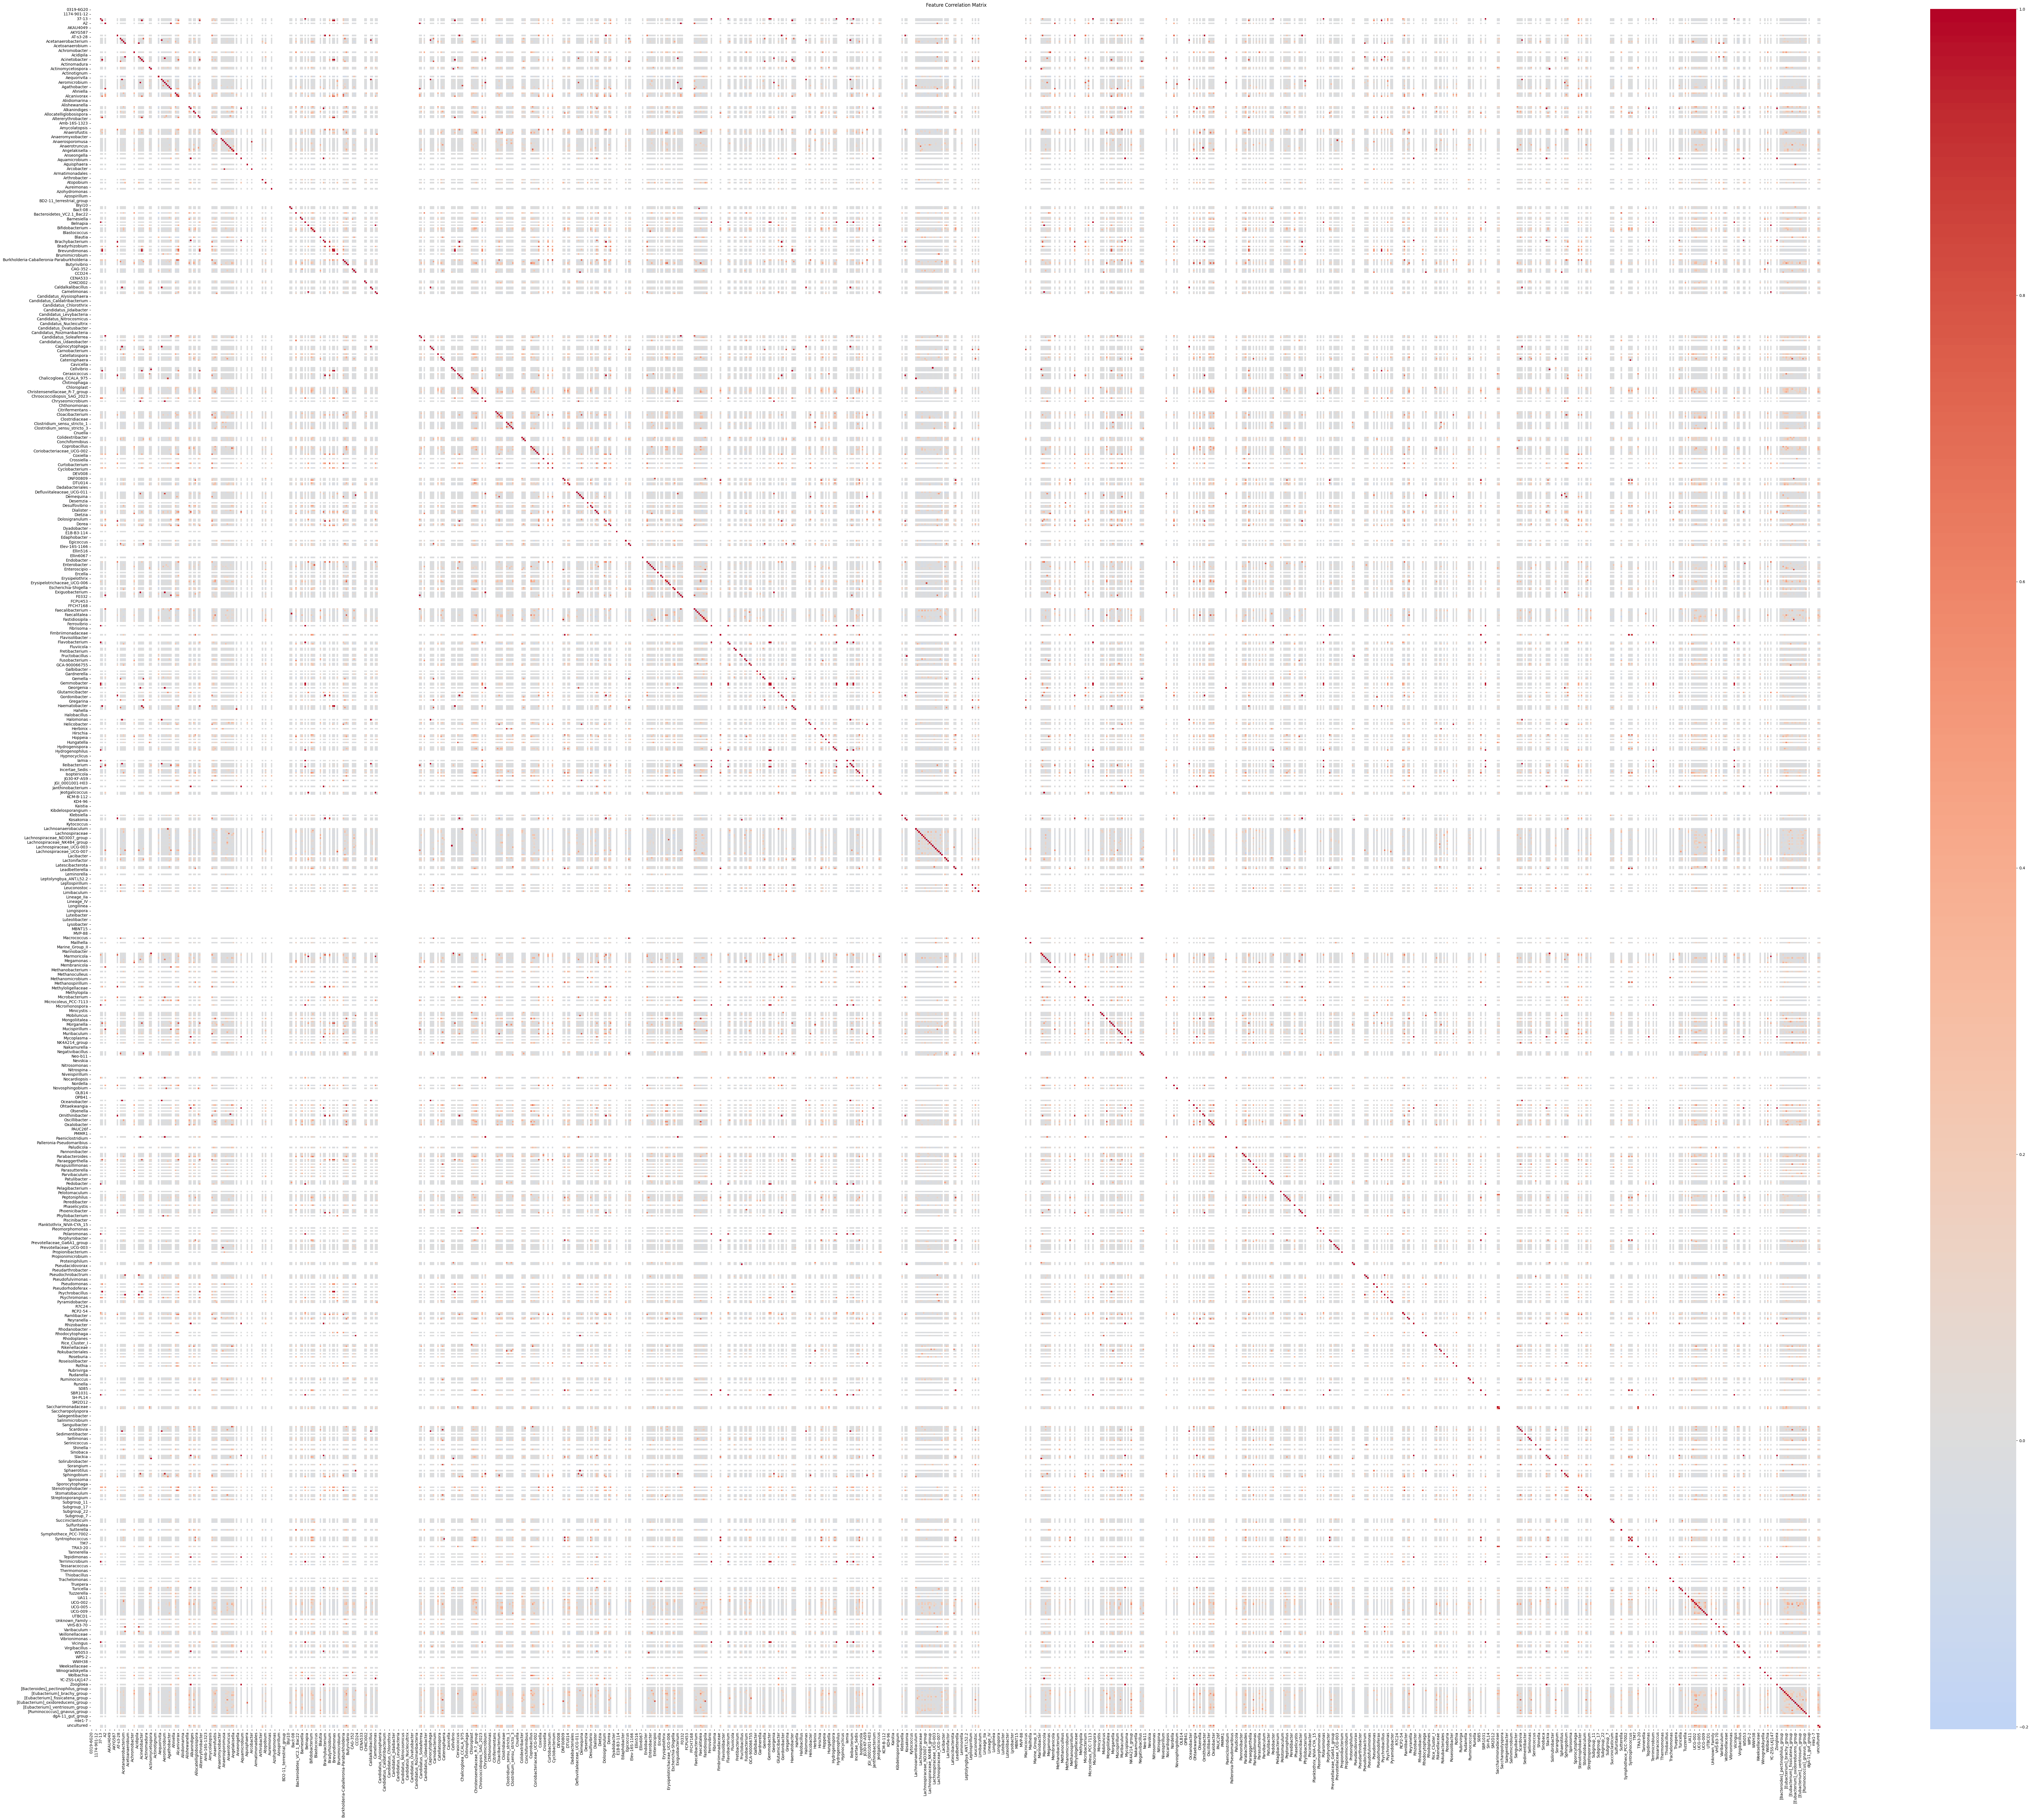

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr()
plt.figure(figsize=(100, 80))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix")
plt.show()


In [48]:
import pandas as pd
import numpy as np

# 상관계수 계산
corr_matrix = X.corr()

# 삼각행렬의 상단만 남겨서 중복 제거
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 절대 상관계수가 0.85 이상인 feature쌍 찾기
high_corr_pairs = upper.stack().reset_index()
high_corr_pairs.columns = ['feature_1', 'feature_2', 'correlation']
high_corr_pairs['abs_corr'] = high_corr_pairs['correlation'].abs()

# 상관계수 높은 순 정렬
high_corr_pairs = high_corr_pairs.sort_values(by='abs_corr', ascending=False)

# 상위 30개만 보기
print(high_corr_pairs.head(400))


                       feature_1      feature_2  correlation  abs_corr
68044            Ferruginibacter   Microlunatus     1.000000  1.000000
80277                 Janibacter    Skermanella     1.000000  1.000000
1099                          A2          F0058     1.000000  1.000000
106096               Skermanella       Zoogloea     1.000000  1.000000
95169                   Oligella    Skermanella     1.000000  1.000000
...                          ...            ...          ...       ...
64776                      F0058  Ileibacterium     0.874322  0.874322
1149                          A2  Ileibacterium     0.874322  0.874322
35109   Candidatus_Saccharimonas  Ileibacterium     0.874322  0.874322
3672               Acetatifactor     Vagococcus     0.873935  0.873935
4589                Acidisphaera     Vagococcus     0.873935  0.873935

[400 rows x 4 columns]


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif_df = pd.DataFrame()
vif_df['Feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df.sort_values(by='VIF', ascending=False)


c:\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning:

invalid value encountered in scalar divide

c:\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



Feature  VIF
6                      37-13  inf
253         Chromohalobacter  inf
512               Janibacter  inf
243   Chalicogloea_CCALA_975  inf
508             JG30-KF-CM45  inf
...                      ...  ...
1127                 mle1-27  NaN
1128                  mle1-7  NaN
1129       possible_genus_04  NaN
1130                type_III  NaN
1133                 wb1-P19  NaN

[1134 rows x 2 columns]

In [49]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 0. 상관계수 기반 제거 함수
def remove_high_corr_features(X, threshold=0.85):
    corr_matrix = X.corr()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]
    X_reduced = X.drop(columns=to_drop)
    return X_reduced, to_drop

# 1. VIF 기반 제거 함수
def remove_high_vif_features(X, vif_threshold=10.0):
    dropped = []
    while True:
        vif_data = pd.DataFrame()
        vif_data["feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        
        max_vif = vif_data["VIF"].max()
        if max_vif > vif_threshold:
            drop_feature = vif_data.loc[vif_data["VIF"].idxmax(), "feature"]
            X = X.drop(columns=[drop_feature])
            dropped.append(drop_feature)
        else:
            break
    return X, dropped

# 2. 전체 실행

# 예: X = df_clean[feature_cols]
# 메타데이터는 미리 분리된 상태여야 함
X = df_clean[feature_cols]

# Step 1: 상관관계 기반 제거
X_corr_filtered, dropped_corr = remove_high_corr_features(X, threshold=0.85)
print(f"[상관계수] 제거된 feature 수: {len(dropped_corr)}")

# Step 2: VIF 기반 추가 제거
X_final, dropped_vif = remove_high_vif_features(X_corr_filtered, vif_threshold=10.0)
print(f"[VIF] 추가 제거된 feature 수: {len(dropped_vif)}")

# 최종 결과
print(f"[최종] 남은 feature 수: {X_final.shape[1]}")


[상관계수] 제거된 feature 수: 125


c:\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning:

invalid value encountered in scalar divide

c:\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide

c:\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning:

invalid value encountered in scalar divide

c:\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide

c:\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning:

invalid value encountered in scalar divide

c:\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide

c:\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning:

invalid value encountered in scal

KeyboardInterrupt: 

In [ ]:
# 상관계수로 제거된 feature 목록 저장
pd.DataFrame(dropped_corr, columns=['feature']).to_csv("removed_by_correlation.csv", index=False)

# VIF로 추가로 제거된 feature 목록 저장
pd.DataFrame(dropped_vif, columns=['feature']).to_csv("removed_by_vif.csv", index=False)


In [51]:
!pip install shap

  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   ---------------------------------------- 544.4/544.4 kB 3.0 MB/s  0:00:00
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)

   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   -------------------------- ------------- 2/3 [shap]
   ---------------------------------------- 3/3 [shap]



c:\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.228e-02, tolerance: 1.039e-02

c:\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.632e-02, tolerance: 1.039e-02

c:\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.394e-02, tolerance: 1.039e-02

c:\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:

선택된 feature 수: 34
              precision    recall  f1-score   support

         0.0       0.69      0.62      0.65        50
         1.0       0.68      0.74      0.71        54

    accuracy                           0.68       104
   macro avg       0.68      0.68      0.68       104
weighted avg       0.68      0.68      0.68       104

AUC: 0.6840740740740741


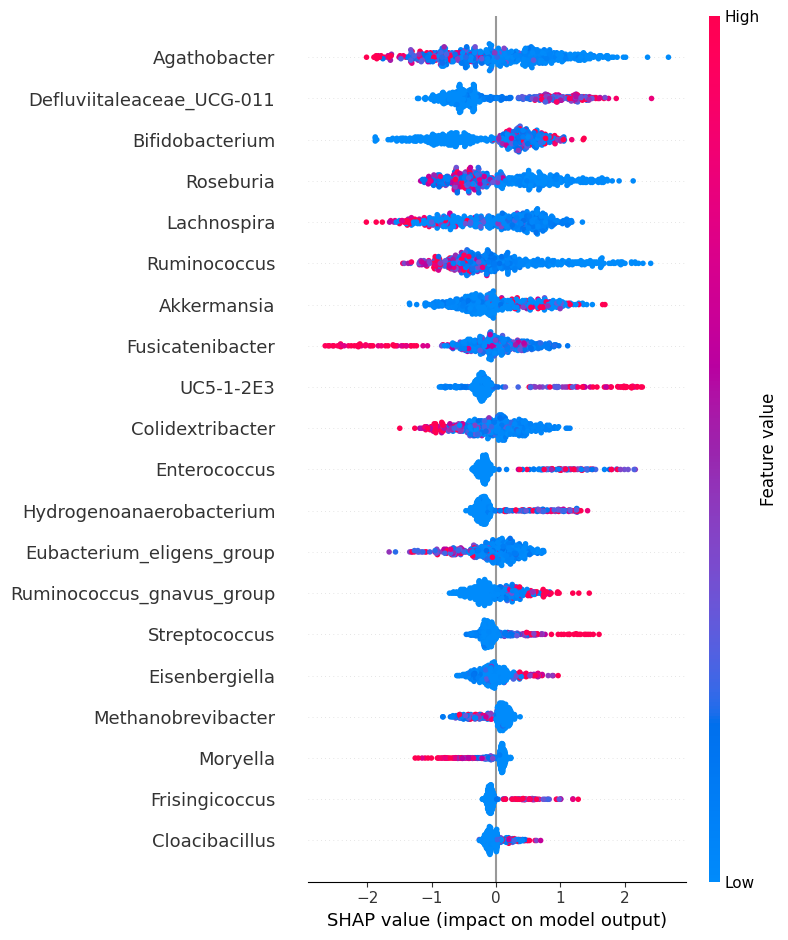

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import classification_report, roc_auc_score
import shap
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로딩 및 분리
df = pd.read_csv("!merged_metadata_feature3.csv")
df = df.drop(columns=['alias'], errors='ignore')
df = df.dropna(subset=['parkinson'])  # 타겟 결측 제거

# 모든 컬럼명을 문자열로 강제 변환 후 금지 문자 제거
df.columns = [str(col).replace('[', '').replace(']', '').replace('<', '').strip() for col in df.columns]


metadata_cols = ['sample_id', 'parkinson']
feature_cols = df.columns.difference(metadata_cols)

X = df[feature_cols]
y = df['parkinson']

# 2. 스케일링 (선형모델에 필요)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. LassoCV로 feature selection
lasso = LassoCV(cv=5, random_state=42, max_iter=10000)
lasso.fit(X_scaled, y)

# Coefficient 기반 feature 선택
coef_series = pd.Series(lasso.coef_, index=X.columns)
selected_features = coef_series[coef_series != 0].index.tolist()
print(f"선택된 feature 수: {len(selected_features)}")

# 4. 선택된 feature로 XGBoost 학습
from xgboost import XGBClassifier

X_selected = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, stratify=y, random_state=42)

model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측 평가
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))

# 5. SHAP 분석
explainer = shap.Explainer(model, X_selected)
shap_values = explainer(X_selected)

# 요약 플롯
shap.summary_plot(shap_values, X_selected)


In [55]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier
import numpy as np

# 1. 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. 스케일링 (라쏘 전용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 3. LassoCV로 feature selection
lasso = LassoCV(cv=5, random_state=42, max_iter=5000)
lasso.fit(X_train_scaled, y_train)

selected_features = np.where(lasso.coef_ != 0)[0]
print(f"선택된 feature 수: {len(selected_features)}")

X_train_sel = X_train.iloc[:, selected_features]
X_test_sel  = X_test.iloc[:, selected_features]

# 4. XGBoost 학습
model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)
model.fit(X_train_sel, y_train)

# 5. 예측
y_pred_train = model.predict(X_train_sel)
y_pred_test  = model.predict(X_test_sel)
y_proba_train = model.predict_proba(X_train_sel)[:, 1]
y_proba_test  = model.predict_proba(X_test_sel)[:, 1]

# 6. 성능 계산
train_acc = accuracy_score(y_train, y_pred_train)
test_acc  = accuracy_score(y_test,  y_pred_test)
train_auc = roc_auc_score(y_train, y_proba_train)
test_auc  = roc_auc_score(y_test,  y_proba_test)

print(f"Train Accuracy: {train_acc:.3f} | Test Accuracy: {test_acc:.3f}")
print(f"Train AUC:      {train_auc:.3f} | Test AUC:      {test_auc:.3f}")

# 7. 과적합 여부 판단
if (train_auc - test_auc) > 0.08:
    print("⚠️ 과적합 가능성 높음 (Train-Test AUC 차이 큼)")
else:
    print("✅ 과적합 신호 크지 않음")


c:\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.599e-02, tolerance: 8.299e-03

c:\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.354e-03, tolerance: 8.299e-03

c:\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.043e-02, tolerance: 8.299e-03

c:\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:

선택된 feature 수: 54
Train Accuracy: 1.000 | Test Accuracy: 0.673
Train AUC:      1.000 | Test AUC:      0.710
⚠️ 과적합 가능성 높음 (Train-Test AUC 차이 큼)


In [54]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# XGBoost 학습
model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 평가
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("Train AUC:", roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]))
print("Test AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


Train Accuracy: 1.0
Test Accuracy: 0.7307692307692307
Train AUC: 1.0
Test AUC: 0.8066666666666666
